In [1]:
# import database
url2019 = "https://odata4.cbs.nl/CBS/84583NED" # Kerncijfers wijken en buurten 2019
url2017 = "https://odata4.cbs.nl/CBS/83765NED" # Kerncijfers wijken en buurten 2017
# Toelichting: https://www.cbs.nl/nl-nl/maatwerk/2017/31/kerncijfers-wijken-en-buurten-2017

In [2]:
import numpy as np
import pandas as pd
import re
import time
import CBSparserOData4
from PC4e6_database import *
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
stemEP, register = laad_uitslagenPC6("adressen_gl_prioriteit/adressen_EP2019.csv")

C:\Users\DKuipers\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3214: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [4]:
demo = laad_CBSdataPC6('CBS_PC6_selectie.csv')

In [5]:
dataPC6 = join_PC6(stemEP,demo)
dataPC6.head()

,nummer,lat,lon,stemperc,prioriteit,totaal,opkomst,D66_stemmen,GL_stemmen,PvdA_stemmen,...,INW_2544,INW_4564,INW_65PL,AANTAL_HH,GEM_HH_GR,WONING,WON_MRGEZ,UITKMINAOW,Perc_NW_migracht,Gemcode2019
PC6,,,,,,,,,,,,,,,,,,,,,
1011AB,111.0,52.377773,4.905684,0.796163,0.0,417.0,0.429675,51.0,153.0,80.0,...,5.0,0.0,0.0,5.0,1.4,0.0,0.0,0.0,NaN,363.0
1011AC,147.0,52.377385,4.908563,0.796163,0.0,417.0,0.429675,51.0,153.0,80.0,...,10.0,0.0,5.0,20.0,1.5,5.0,5.0,0.0,20.0,363.0
1011AD,1.0,52.376820,4.904492,0.741339,0.0,433.0,0.481914,54.0,118.0,102.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,363.0
1011AE,145.0,52.376399,4.910231,0.796163,0.0,417.0,0.429675,51.0,153.0,80.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,363.0
1011AG,98.5,52.375865,4.902948,0.741339,0.0,433.0,0.481914,54.0,118.0,102.0,...,5.0,0.0,0.0,5.0,1.6,0.0,0.0,0.0,NaN,363.0


In [6]:
feature_select = ['MAN','VROUW','UITKMINAOW','WON_MRGEZ']
dataPC6 = normaliseer_PC6(dataPC6,feature_select)
dataPC6.describe()

['MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL', 'UITKMINAOW', 'WON_MRGEZ', 'stemperc', 'D66_percentage', 'GL_percentage', 'PvdA_percentage', 'PvdD_percentage', 'SP_percentage', 'DENK_percentage']


,MAN,VROUW,INW_014,INW_1524,INW_2544,INW_4564,INW_65PL,UITKMINAOW,WON_MRGEZ,stemperc,D66_percentage,GL_percentage,PvdA_percentage,PvdD_percentage,SP_percentage,DENK_percentage
count,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000,1.307070e+05,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000,130707.000000
mean,0.489147,0.501723,0.112893,0.094116,0.268851,0.239767,0.138022,0.066994,inf,0.566676,0.087283,0.160365,0.197811,0.052753,0.038944,0.029497
std,0.114698,0.114913,0.120395,0.133770,0.185154,0.149823,0.195499,0.114368,NaN,0.117344,0.035941,0.075665,0.042883,0.019394,0.020902,0.058124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.049505,0.005780,0.000000,0.014851,0.000000,0.000000,0.000000
25%,0.428571,0.444444,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000e+00,0.486239,0.059184,0.100683,0.168831,0.039124,0.023307,0.001852
50%,0.500000,0.500000,0.100000,0.000000,0.260870,0.250000,0.062500,0.000000,1.428571e-01,0.561662,0.081905,0.142365,0.195041,0.051370,0.035242,0.008163
75%,0.555556,0.571429,0.200000,0.153846,0.384615,0.333333,0.200000,0.114286,1.000000e+00,0.657012,0.112360,0.212421,0.223479,0.064599,0.050773,0.029412
max,1.000000,1.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,0.907937,0.217445,0.438486,0.363853,0.184035,0.139130,0.585034


In [7]:
xcols = list(dataPC6.columns[0:10])
print(xcols)

['MAN', 'VROUW', 'INW_014', 'INW_1524', 'INW_2544', 'INW_4564', 'INW_65PL', 'UITKMINAOW', 'WON_MRGEZ', 'stemperc']


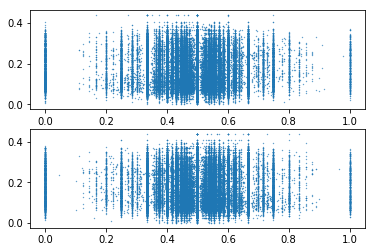

In [8]:
# Met dank aan https://www.w3schools.com/python/python_ml_linear_regression.asp
plot_selectie = ['MAN','VROUW']
y_feature = 'GL_percentage'
fig, ax = plt.subplots( len(plot_selectie) )
kolommen = ['slope','intercept','r','p','std_err']
rijen = []

for n, feature in enumerate(plot_selectie):
    x = dataPC6[feature]
    slope, intercept, r, p, std_err = stats.linregress(x, dataPC6[y_feature])
    rij = pd.Series((slope,intercept,r,p,std_err), index = kolommen)
    rijen.append(rij)
    
    def linfunc(x):
        return slope*x + intercept
    linmodel = list(map(linfunc, x))
    ax[n].scatter(x,dataPC6[y_feature], s=0.1)

data = pd.DataFrame(rijen, index = plot_selectie)
plt.show()

[]

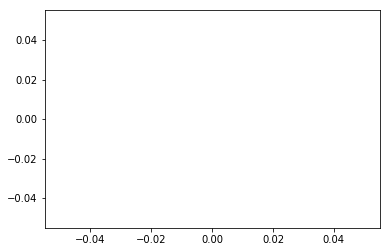

In [9]:
#print(data)
plt.plot()

In [10]:
a = pd.Series(row,index=kolommen)
print(a)
b = pd.Series(row,index=kolommen)
pd.DataFrame([a,b])

NameError: name 'row' is not defined

Misschien is het goed om de uitschieters in de data te bekijken. Welke invloed het nemen van de mediaan heeft bij het laden van de uitslagen?